In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
ebola = pd.read_csv('./data/country_timeseries.csv')

## pandas 日期时间数据类型 默认DateTime64[ns]

### 读取后进行转换

In [3]:
pd.to_datetime(ebola['Date'])

0     2015-01-05
1     2015-01-04
2     2015-01-03
3     2015-01-02
4     2014-12-31
         ...    
117   2014-03-27
118   2014-03-26
119   2014-03-25
120   2014-03-24
121   2014-03-22
Name: Date, Length: 122, dtype: datetime64[ns]

### 读取时进行parse

In [4]:
ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### 时间戳类型 Timestamp

## 提取不同维度的日期信息

### 单个时间戳获提取

In [5]:
time_stamp = pd.to_datetime('2023-09-01')
time_stamp.day

1

### 一列数据提取

In [6]:
ebola['year'] = ebola['Date'].dt.year
ebola['month'] = ebola['Date'].dt.month
ebola['day'] = ebola['Date'].dt.day

In [7]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015,1,5
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015,1,4
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015,1,3
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,2
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014,12,31


## 日期时间计算

### 日期运算得到数据类型 Timedelta

In [8]:
time_stamp1 = pd.to_datetime('2023-09-01')
time_stamp2 = pd.to_datetime('2022-09-01')
time = time_stamp1 - time_stamp2
time

Timedelta('365 days 00:00:00')

### 案例：银行破产

In [9]:
banks = pd.read_csv('./data/banklist.csv', parse_dates=['Closing Date', 'Updated Date'])
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18
...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,2014-08-19
549,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,2002-11-18
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,2003-02-18
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,2005-03-17


In [10]:
# 统计倒闭季度、倒闭年份
banks['Closing_Quarter'] = banks['Closing Date'].dt.quarter
banks['Closing_Year'] = banks['Closing Date'].dt.year
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Closing_Quarter,Closing_Year
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26,2,2017
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18,1,2017
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18,1,2017
...,...,...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,2014-08-19,3,2001
549,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,2002-11-18,2,2001
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,2003-02-18,1,2001
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,2005-03-17,4,2000


In [11]:
# 图像化倒闭信息
banks.columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date', 'Closing_Quarter', 'Closing_Year'],
      dtype='object')

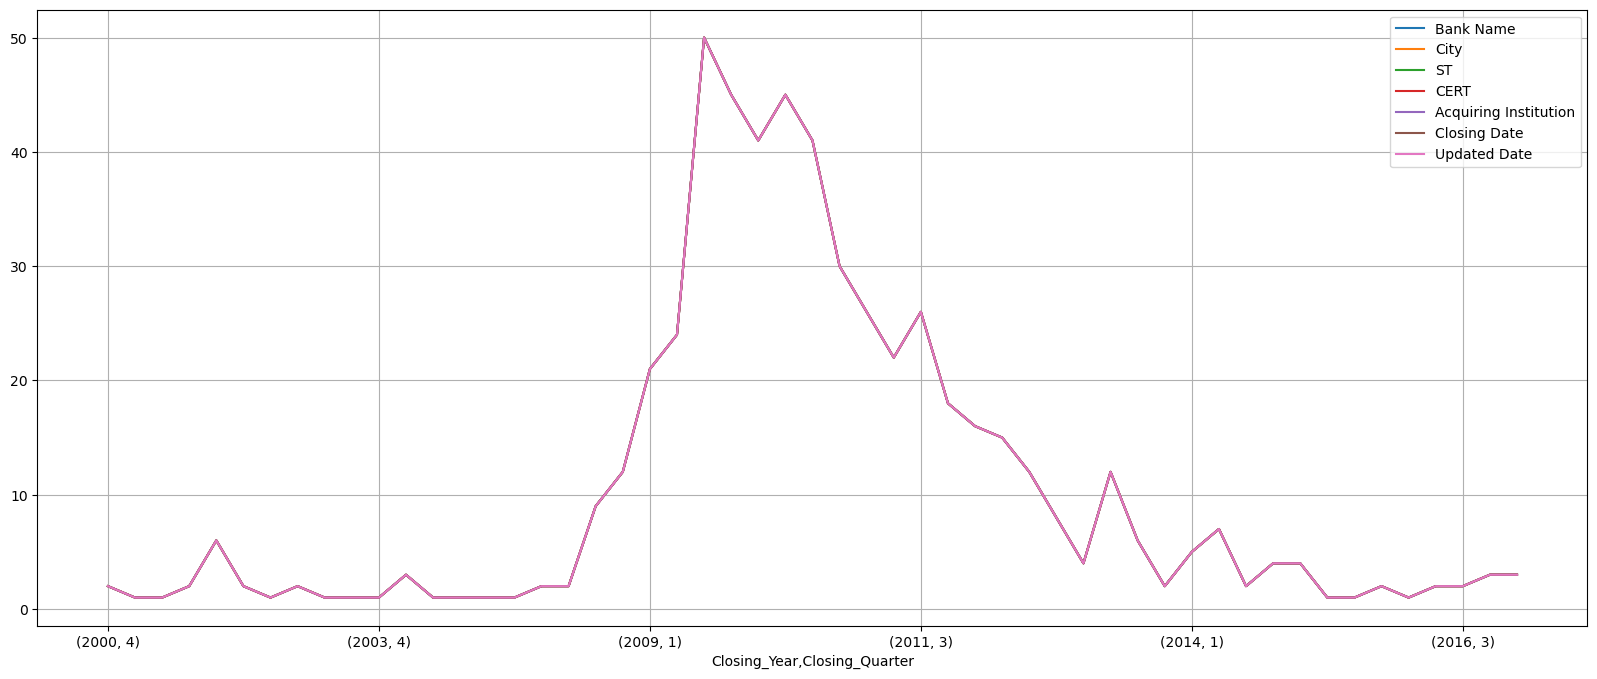

In [12]:
banks.groupby(['Closing_Year', 'Closing_Quarter']).count().plot(grid=True, figsize=(20, 8))
plt.show()

## 日期时间索引 DatetimeIndex TimeDeltaIndex

### 将Datetime64设置为索引，就是DatetimeIndex

#### 案例：股票数据

In [13]:
tesla_stock = pd.read_csv('./data/TSLA.csv', parse_dates=[0])

In [14]:
tesla_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1215 non-null   datetime64[ns]
 1   High       1215 non-null   float64       
 2   Low        1215 non-null   float64       
 3   Open       1215 non-null   float64       
 4   Close      1215 non-null   float64       
 5   Volume     1215 non-null   int64         
 6   Adj Close  1215 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 66.6 KB


In [15]:
# 设置日期时间索引
tesla_stock.set_index('Date', inplace=True)

In [16]:
tesla_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1215 entries, 2015-08-19 to 2020-06-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1215 non-null   float64
 1   Low        1215 non-null   float64
 2   Open       1215 non-null   float64
 3   Close      1215 non-null   float64
 4   Volume     1215 non-null   int64  
 5   Adj Close  1215 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 66.4 KB


In [17]:
# 转换后，在获取，会简化很多
tesla_stock.loc['2015']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000
2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993
2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004
2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995
2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999
...,...,...,...,...,...,...
2015-12-24,231.880005,228.279999,230.559998,230.570007,708000,230.570007
2015-12-28,231.979996,225.539993,231.490005,228.949997,1901300,228.949997
2015-12-29,237.720001,229.550003,230.059998,237.190002,2406300,237.190002


In [18]:
tesla_stock.loc['2015-08']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000
2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993
2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004
2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995
2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999
2015-08-26,228.000000,215.509995,227.929993,224.839996,4963000,224.839996
2015-08-27,244.750000,230.809998,231.000000,242.990005,7656000,242.990005
2015-08-28,251.449997,241.570007,241.860001,248.479996,5513700,248.479996
2015-08-31,254.949997,245.509995,245.619995,249.059998,4700200,249.059998


### 将Timedelta64设置为索引，就是TimedeltaIndex

In [19]:
tesla_stock.reset_index(inplace=True)

In [20]:
tesla_stock

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000
1,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993
2,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004
3,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995
4,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999
...,...,...,...,...,...,...,...
1210,2020-06-10,1027.479980,982.500000,991.880005,1025.050049,18563400,1025.050049
1211,2020-06-11,1018.960022,972.000000,990.200012,972.840027,15916500,972.840027
1212,2020-06-12,987.979980,912.599976,980.000000,935.280029,16730200,935.280029
1213,2020-06-15,998.840027,908.500000,917.789978,990.900024,15697200,990.900024


In [21]:
# 日期差
tesla_stock['ref_date'] = tesla_stock['Date'] - tesla_stock['Date'].min()

### DataFrame loc 方式新增一列，在pandas 1.1的版本需要带上“所有行切片”

In [22]:
tesla_stock.loc[:, 'ref_date_copy'] = tesla_stock['ref_date']
tesla_stock

,Date,High,Low,Open,Close,Volume,Adj Close,ref_date,ref_date_copy
0,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000,0 days,0 days
1,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993,1 days,1 days
2,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004,2 days,2 days
3,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995,5 days,5 days
4,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999,6 days,6 days
...,...,...,...,...,...,...,...,...,...
1210,2020-06-10,1027.479980,982.500000,991.880005,1025.050049,18563400,1025.050049,1757 days,1757 days
1211,2020-06-11,1018.960022,972.000000,990.200012,972.840027,15916500,972.840027,1758 days,1758 days
1212,2020-06-12,987.979980,912.599976,980.000000,935.280029,16730200,935.280029,1759 days,1759 days
1213,2020-06-15,998.840027,908.500000,917.789978,990.900024,15697200,990.900024,1762 days,1762 days


In [23]:
tesla_stock.set_index('ref_date', inplace=True)
tesla_stock

,Date,High,Low,Open,Close,Volume,Adj Close,ref_date_copy
ref_date,,,,,,,,
0 days,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000,0 days
1 days,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993,1 days
2 days,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004,2 days
5 days,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995,5 days
6 days,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999,6 days
...,...,...,...,...,...,...,...,...
1757 days,2020-06-10,1027.479980,982.500000,991.880005,1025.050049,18563400,1025.050049,1757 days
1758 days,2020-06-11,1018.960022,972.000000,990.200012,972.840027,15916500,972.840027,1758 days
1759 days,2020-06-12,987.979980,912.599976,980.000000,935.280029,16730200,935.280029,1759 days


In [24]:
# 观察索引类型 TimedeltaIndex
tesla_stock.info() 

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 1215 entries, 0 days to 1763 days
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Date           1215 non-null   datetime64[ns] 
 1   High           1215 non-null   float64        
 2   Low            1215 non-null   float64        
 3   Open           1215 non-null   float64        
 4   Close          1215 non-null   float64        
 5   Volume         1215 non-null   int64          
 6   Adj Close      1215 non-null   float64        
 7   ref_date_copy  1215 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), timedelta64[ns](1)
memory usage: 85.4 KB


#### 使用TimedeltaIndex时间差值索引的便捷性

In [25]:
tesla_stock.index

TimedeltaIndex([   '0 days',    '1 days',    '2 days',    '5 days',
                   '6 days',    '7 days',    '8 days',    '9 days',
                  '12 days',   '13 days',
                ...
                '1750 days', '1751 days', '1752 days', '1755 days',
                '1756 days', '1757 days', '1758 days', '1759 days',
                '1762 days', '1763 days'],
               dtype='timedelta64[ns]', name='ref_date', length=1215, freq=None)

In [26]:
# 获取差值为2天的数据
tesla_stock.loc['2 days']

Date             2015-08-21 00:00:00
High                      243.800003
Low                       230.509995
Open                           236.0
Close                     230.770004
Volume                       6590200
Adj Close                 230.770004
ref_date_copy        2 days 00:00:00
Name: 2 days 00:00:00, dtype: object

In [27]:
pd.__version__

'1.5.3'

In [28]:
# 获取差值为10天内的数据
tesla_stock.loc['0 days':'12 days', :]

,Date,High,Low,Open,Close,Volume,Adj Close,ref_date_copy
ref_date,,,,,,,,
0 days,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000,0 days
1 days,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993,1 days
2 days,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004,2 days
5 days,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995,5 days
6 days,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999,6 days
7 days,2015-08-26,228.000000,215.509995,227.929993,224.839996,4963000,224.839996,7 days
8 days,2015-08-27,244.750000,230.809998,231.000000,242.990005,7656000,242.990005,8 days
9 days,2015-08-28,251.449997,241.570007,241.860001,248.479996,5513700,248.479996,9 days
12 days,2015-08-31,254.949997,245.509995,245.619995,249.059998,4700200,249.059998,12 days


## pd.date_range创建连续日期范围

In [29]:
pd.date_range('2023-08-01', '2023-10-30', freq='B')

DatetimeIndex(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-28',
               '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
               '2023-09-04', '2023-09-05', '2023-09-06', '2023-09-07',
               '2023-09-08', '2023-09-11', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15', '2023-09-18', '2023-09-19',
               '2023-09-20', '2023-09-21', '2023-09-22', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
               '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05',
               '2023-10-06', '2023-10-09', '2023-10-10', '2023-10-11',
               '2023-10-12', '2023-10-13', '2023-10-16', '2023-10-17',
      

In [30]:
pd.date_range('2023-08-01', '2023-10-30', freq='2B')

DatetimeIndex(['2023-08-01', '2023-08-03', '2023-08-07', '2023-08-09',
               '2023-08-11', '2023-08-15', '2023-08-17', '2023-08-21',
               '2023-08-23', '2023-08-25', '2023-08-29', '2023-08-31',
               '2023-09-04', '2023-09-06', '2023-09-08', '2023-09-12',
               '2023-09-14', '2023-09-18', '2023-09-20', '2023-09-22',
               '2023-09-26', '2023-09-28', '2023-10-02', '2023-10-04',
               '2023-10-06', '2023-10-10', '2023-10-12', '2023-10-16',
               '2023-10-18', '2023-10-20', '2023-10-24', '2023-10-26',
               '2023-10-30'],
              dtype='datetime64[ns]', freq='2B')

In [31]:
# 每个月的第一个星期四
# w week
# o of
# m month
pd.date_range('2023-08-01', '2023-10-30', freq='WOM-1THU')

DatetimeIndex(['2023-08-03', '2023-09-07', '2023-10-05'], dtype='datetime64[ns]', freq='WOM-1THU')

## 案例：犯罪报警记录

In [34]:
crime = pd.read_csv('./data/crime.csv', parse_dates=['REPORTED_DATE'])
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [39]:
crime.set_index('REPORTED_DATE',inplace=True)

In [40]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460911 entries, 2014-06-29 02:01:00 to 2017-09-12 09:30:00
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_TYPE_ID      460911 non-null  object 
 1   OFFENSE_CATEGORY_ID  460911 non-null  object 
 2   GEO_LON              457296 non-null  float64
 3   GEO_LAT              457296 non-null  float64
 4   NEIGHBORHOOD_ID      460911 non-null  object 
 5   IS_CRIME             460911 non-null  int64  
 6   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 28.1+ MB


In [41]:
# 查看某一天的报警记录
crime.loc['2014-06-29']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...
2014-06-29 15:36:00,theft-of-motor-vehicle,auto-theft,-105.024077,39.770150,sunnyside,1,0
2014-06-29 16:09:00,sex-aslt-non-rape-pot,sexual-assault,NaN,NaN,east-colfax,1,0
2014-06-29 23:30:00,menacing-felony-w-weap,aggravated-assault,-104.819770,39.796053,montbello,1,0


In [54]:
# 查看某一段时间的犯罪记录
crime.loc['2014-01-01 00:08:00':'2014-12-30 23:59:00'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-01-01 00:08:00,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:08:00,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:38:00,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1,0
2014-01-01 00:39:00,robbery-street,robbery,-104.979260,39.753859,five-points,1,0
2014-01-01 01:00:00,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1,0
...,...,...,...,...,...,...,...
2014-12-30 22:58:00,theft-of-motor-vehicle,auto-theft,-104.948729,39.781464,elyria-swansea,1,0
2014-12-30 23:01:00,traf-other,all-other-crimes,-104.901985,39.739876,east-colfax,1,0
2014-12-30 23:10:00,burglary-residence-by-force,burglary,-104.903845,39.707702,washington-virginia-vale,1,0


In [46]:
# 时间段可以包括小时分钟
crime.loc['2014-01-01 00:00:00':'2014-01-01 23:59:59'].sort_index()

/var/folders/b4/glz9zwj572q15bxbv_pxjymm0000gn/T/ipykernel_864/2185604724.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  crime.loc['2014-01-01 00:00:00':'2014-01-01 23:59:59'].sort_index()


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-01-01 00:08:00,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:08:00,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:38:00,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1,0
2014-01-01 00:39:00,robbery-street,robbery,-104.979260,39.753859,five-points,1,0
2014-01-01 01:00:00,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1,0
...,...,...,...,...,...,...,...
2014-01-01 23:11:00,traffic-accident,traffic-accident,-104.799964,39.798282,gateway-green-valley-ranch,0,1
2014-01-01 23:12:00,curfew,public-disorder,-105.050924,39.740352,west-colfax,1,0
2014-01-01 23:12:00,public-order-crimes-other,all-other-crimes,-105.050924,39.740352,west-colfax,1,0


In [48]:
# 查询凌晨两点到五点的报警记录
# def between_time(
#         self: NDFrameT,
#         start_time,
#         end_time,
#         include_start: bool_t | lib.NoDefault = lib.no_default,
#         include_end: bool_t | lib.NoDefault = lib.no_default,
#         inclusive: IntervalClosedType | None = None,
#         axis=None,
#     ) -> NDFrameT:
crime.between_time('02:00', '05:00')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


In [55]:
# 查看某一时刻
crime.at_time('05:43')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-10-06 05:43:00,theft-of-motor-vehicle,auto-theft,-105.038353,39.673947,harvey-park,1,0
2017-02-21 05:43:00,criminal-mischief-other,public-disorder,-105.018762,39.733304,sun-valley,1,0
2017-04-10 05:43:00,theft-of-motor-vehicle,auto-theft,-104.756682,39.775239,gateway-green-valley-ranch,1,0
2017-05-01 05:43:00,theft-of-motor-vehicle,auto-theft,-105.047536,39.696609,mar-lee,1,0
2017-05-12 05:43:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.093418,39.633491,marston,1,0
...,...,...,...,...,...,...,...
2012-04-15 05:43:00,weapon-by-prev-offender-powpo,all-other-crimes,-105.010912,39.710724,athmar-park,1,0
2013-06-08 05:43:00,public-order-crimes-other,all-other-crimes,-104.982946,39.715058,speer,1,0
2013-06-08 05:43:00,theft-of-motor-vehicle,auto-theft,-104.892416,39.653733,hampden,1,0


### 比较排序前后的切片性能， 先排序后切片

In [57]:
sorted_crime = crime.sort_index()

In [58]:
%timeit crime.loc['2014-01-01 00:08:00':'2014-12-30 23:59:00']

7.79 ms ± 404 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [59]:
%timeit sorted_crime.loc['2014-01-01 00:08:00':'2014-12-30 23:59:00']

757 µs ± 70.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [60]:
# 统计每周报警数量
sorted_crime.resample('W').size()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

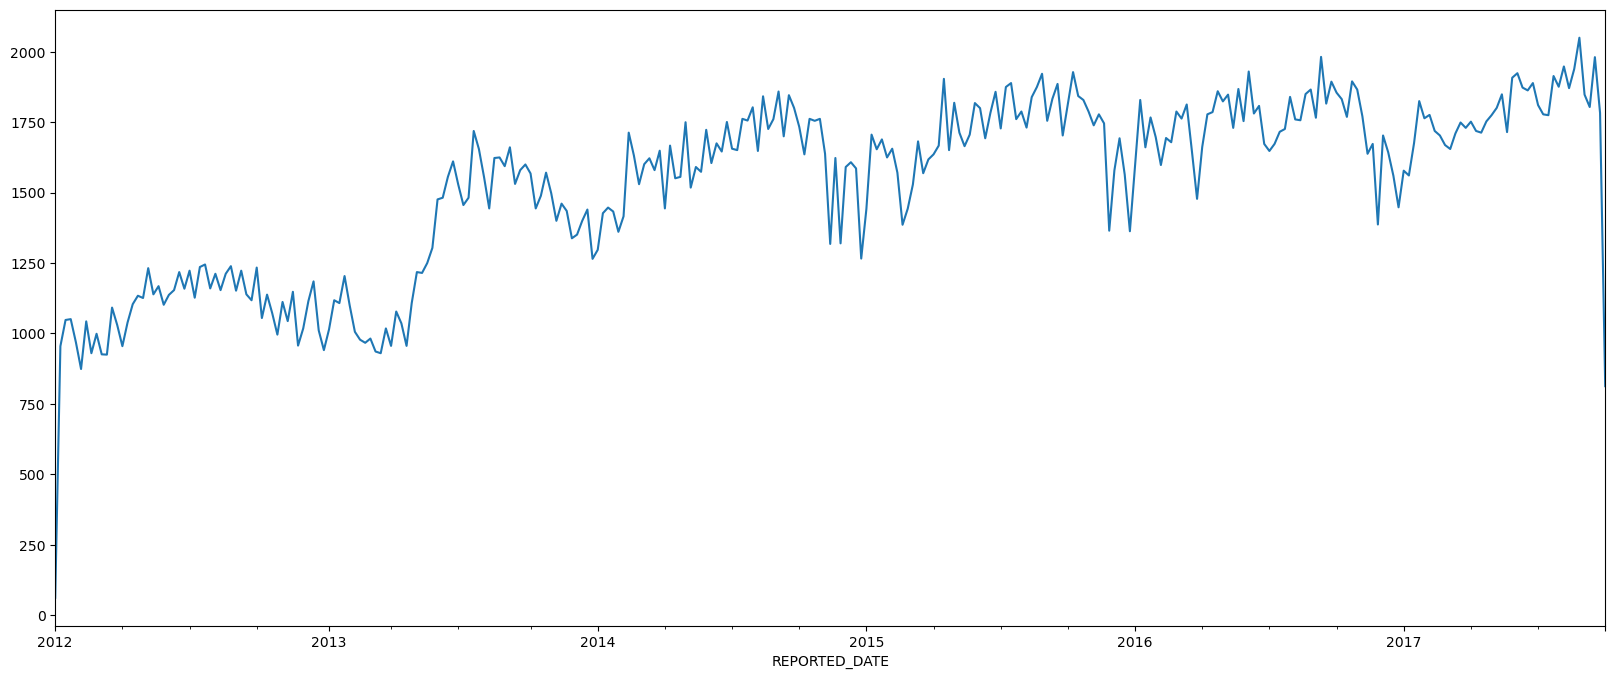

In [62]:
sorted_crime.resample('W-MON').size().plot(figsize=(20, 8))
plt.show()

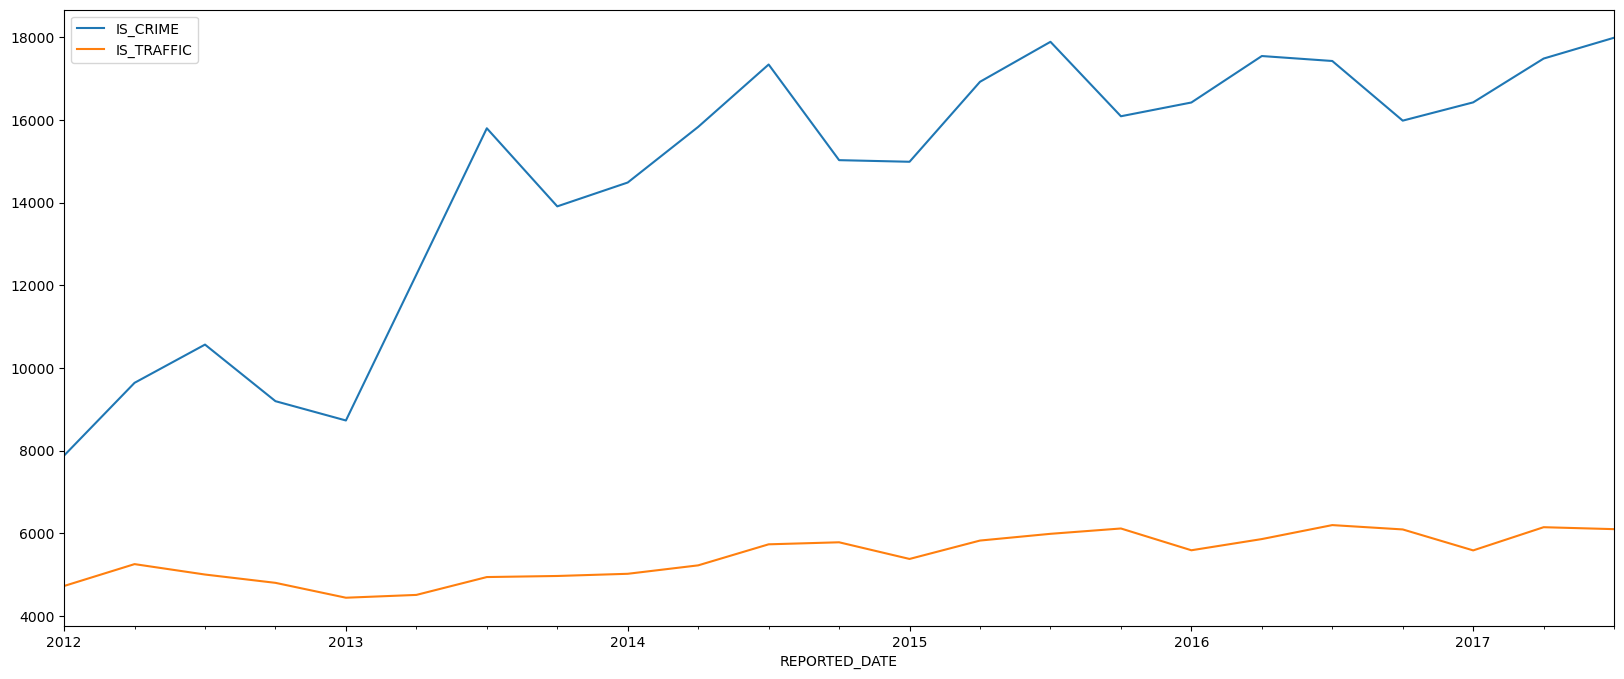

In [65]:
# 分析每季度犯罪和交通事故的数据
sorted_crime.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum().plot(figsize=(20, 8))
plt.show()

<Axes: >

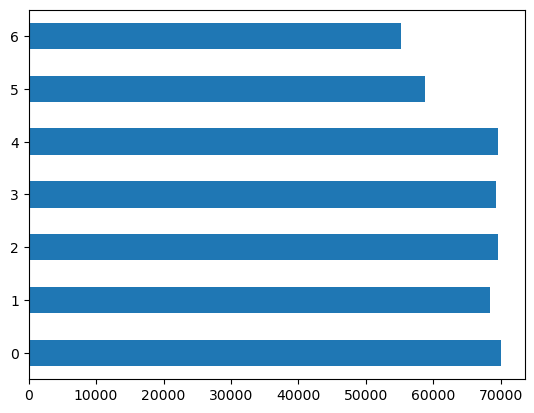

In [72]:
# 分析工作日的犯罪情况
sorted_crime.reset_index()['REPORTED_DATE'].dt.weekday.value_counts().sort_index().plot(kind='barh')